In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Load Dataset

In [2]:
df = pd.read_csv('winequality-red.csv')
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


<AxesSubplot:ylabel='Count'>

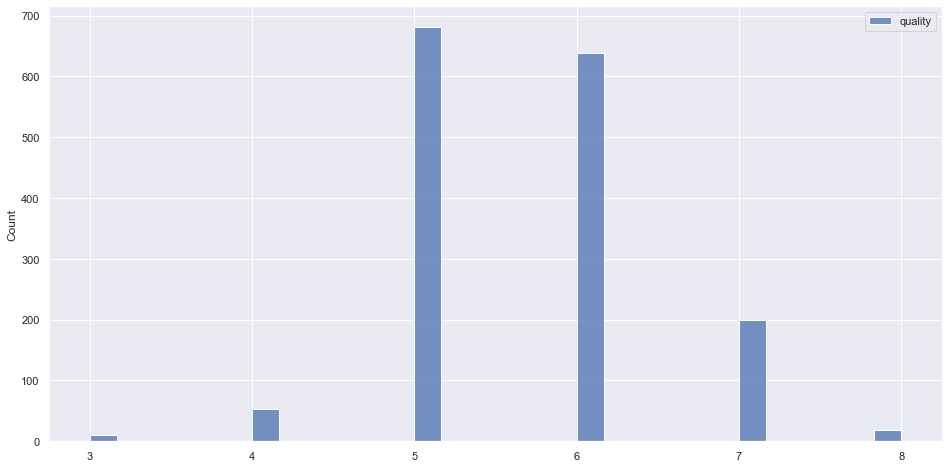

In [4]:
quality = pd.DataFrame(df['quality'])

f = plt.figure(figsize=(16, 8))
sb.histplot(data = quality)

# Correlation - to check variables affecting the quality of wine

<AxesSubplot:>

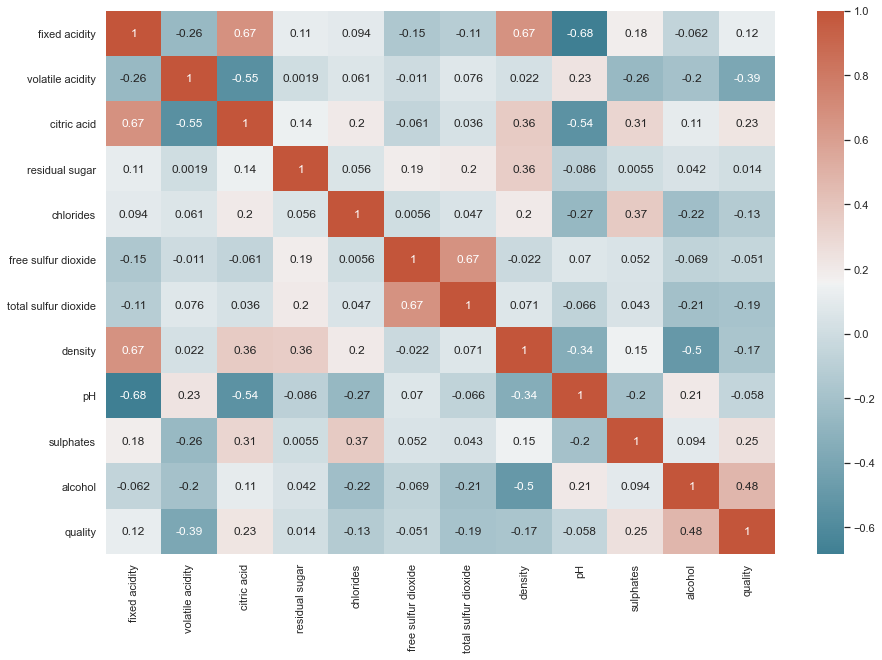

In [5]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sb.diverging_palette(220, 20, as_cmap=True))

# Plot boxplot to check quality against every other variable

In [28]:
others = pd.DataFrame(df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])

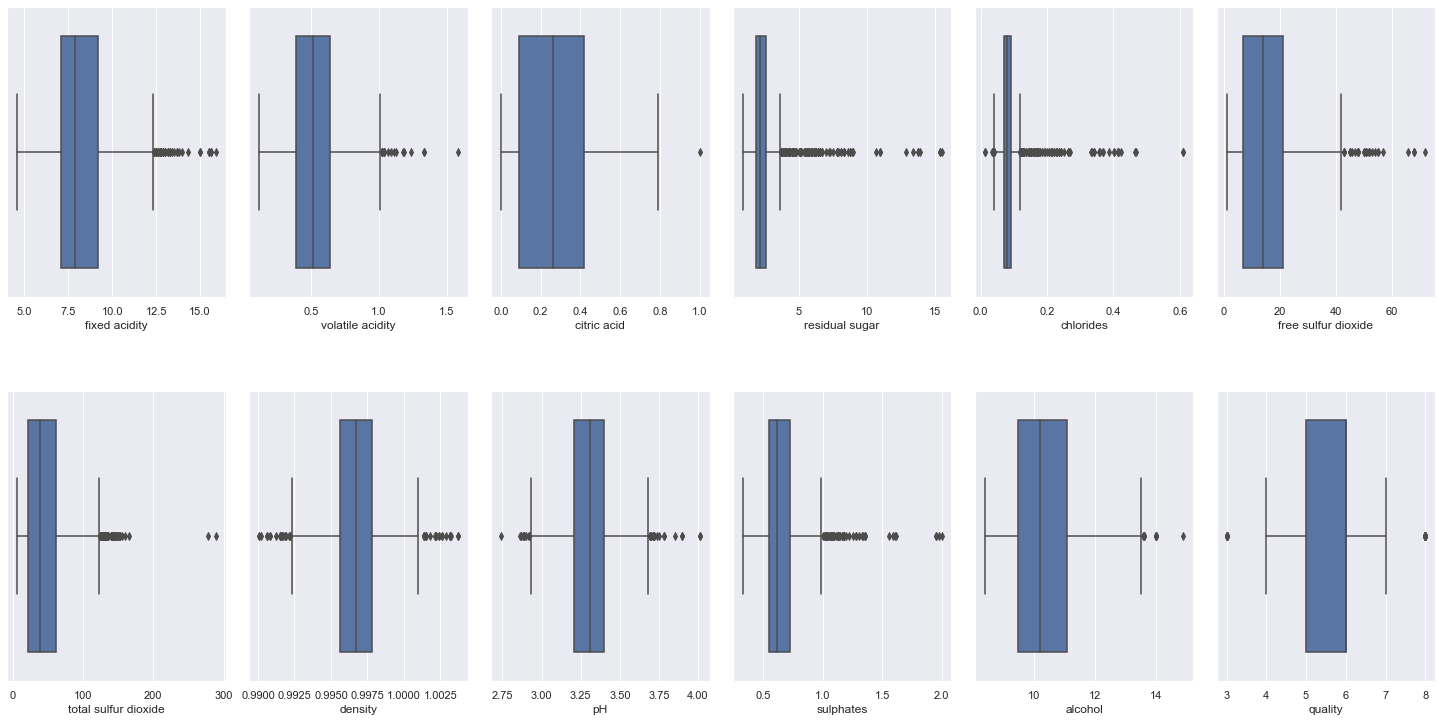

In [30]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sb.boxplot(x=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

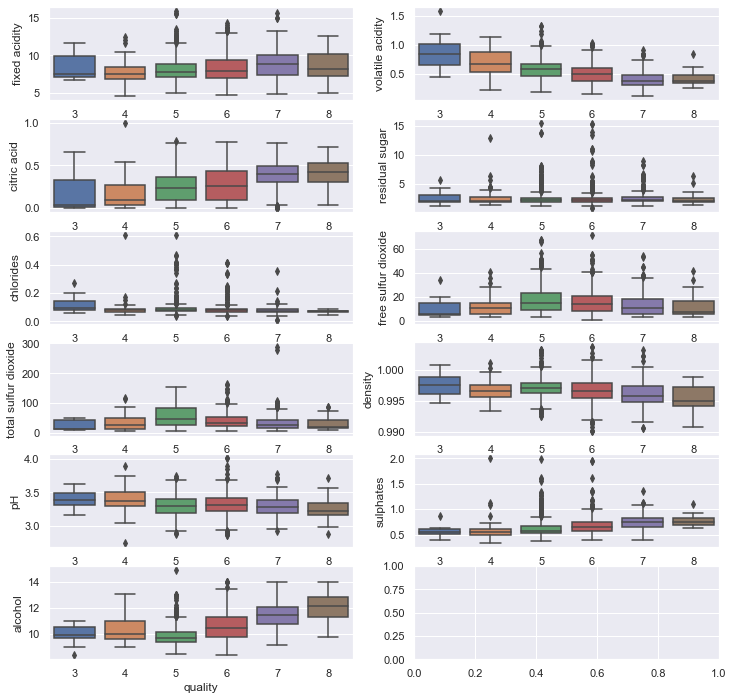

In [77]:
f, axes = plt.subplots(6, 2, figsize=(12, 12))

sb.boxplot(x = 'quality', y = 'fixed acidity', data = df, ax = axes[0,0])
sb.boxplot(x = 'quality', y = 'volatile acidity', data = df, ax = axes[0,1])
sb.boxplot(x = 'quality', y = 'citric acid', data = df, ax = axes[1,0])
sb.boxplot(x = 'quality', y = 'residual sugar', data = df, ax = axes[1,1])
sb.boxplot(x = 'quality', y = 'chlorides', data = df, ax = axes[2,0])
sb.boxplot(x = 'quality', y = 'free sulfur dioxide', data = df, ax = axes[2,1])
sb.boxplot(x = 'quality', y = 'total sulfur dioxide', data = df, ax = axes[3,0])
sb.boxplot(x = 'quality', y = 'density', data = df, ax = axes[3,1])
sb.boxplot(x = 'quality', y = 'pH', data = df, ax = axes[4,0])
sb.boxplot(x = 'quality', y = 'sulphates', data = df, ax = axes[4,1])
sb.boxplot(x = 'quality', y = 'alcohol', data = df, ax = axes[5,0])

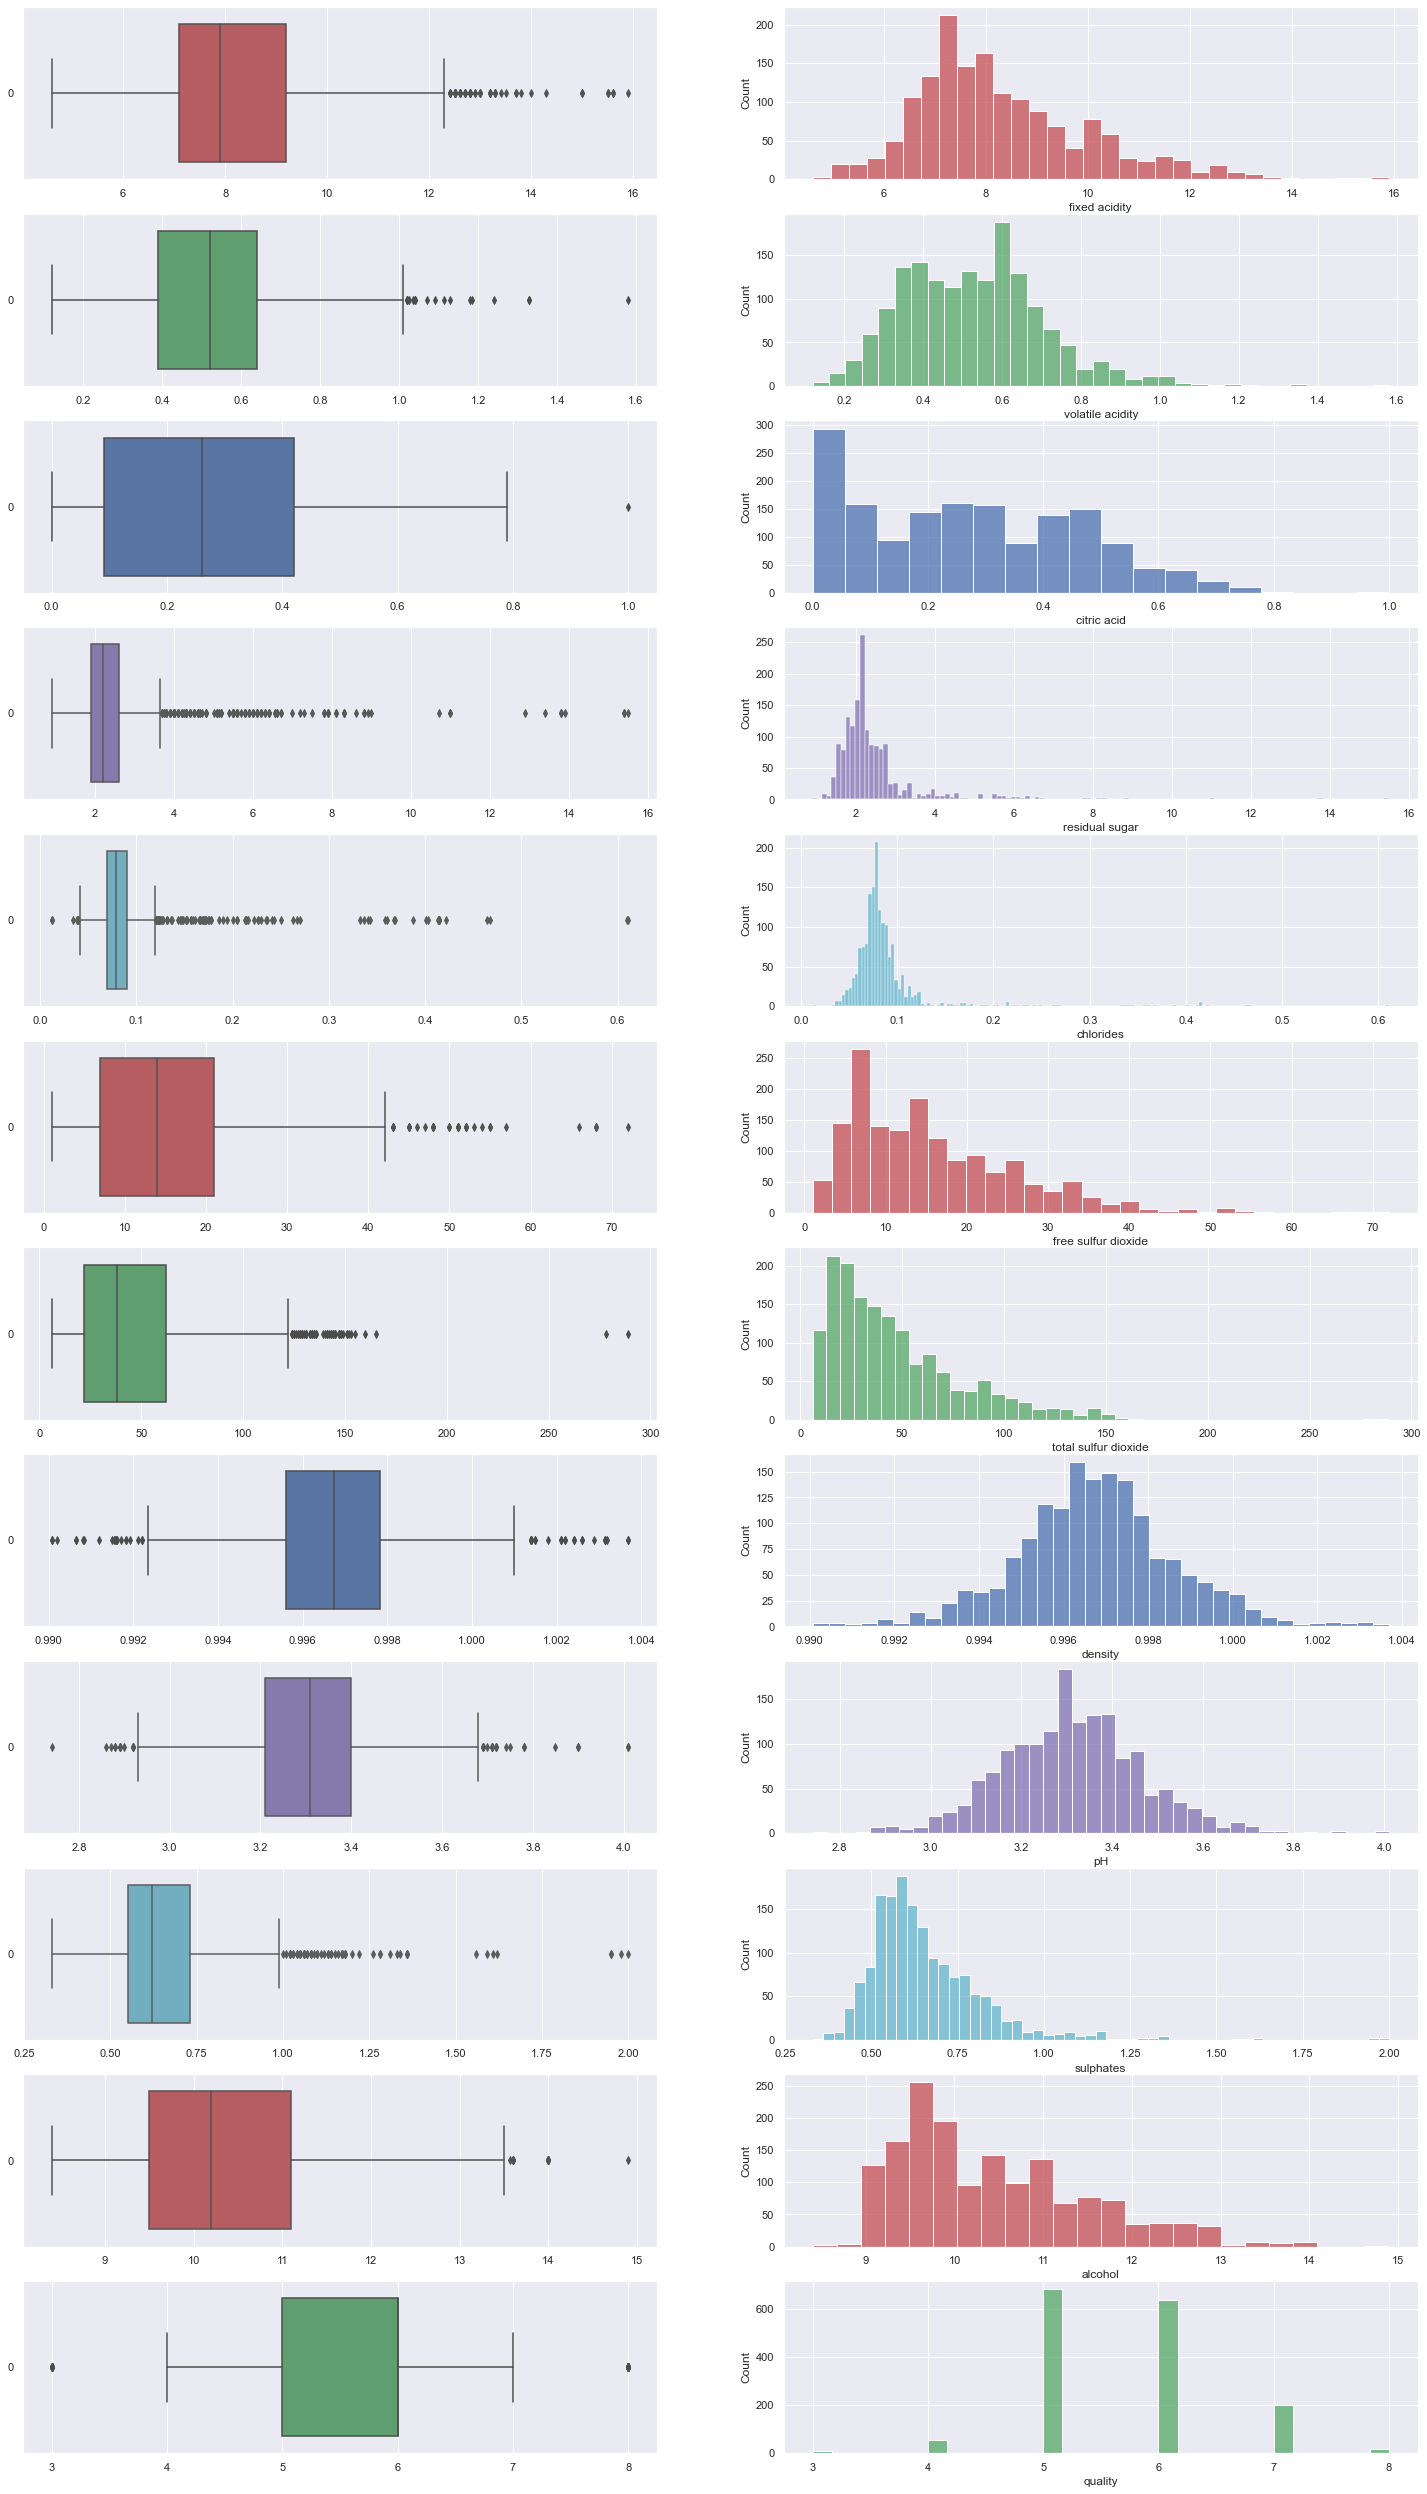

In [85]:
f, axes = plt.subplots(12, 2, figsize=(25, 45))
colors = ["r", "g", "b", "m", "c", "r", "g", "b", "m", "c","r", "g"]

count = 0
for var in df:
    sb.boxplot(data=df[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.histplot(data=df[var], color = colors[count], ax = axes[count,1])
    count += 1

TypeError: '('fixed acidity', 0        7.4
1        7.8
2        7.8
3       11.2
4        7.4
        ... 
1594     6.2
1595     5.9
1596     6.3
1597     5.9
1598     6.0
Name: fixed acidity, Length: 1599, dtype: float64)' is an invalid key

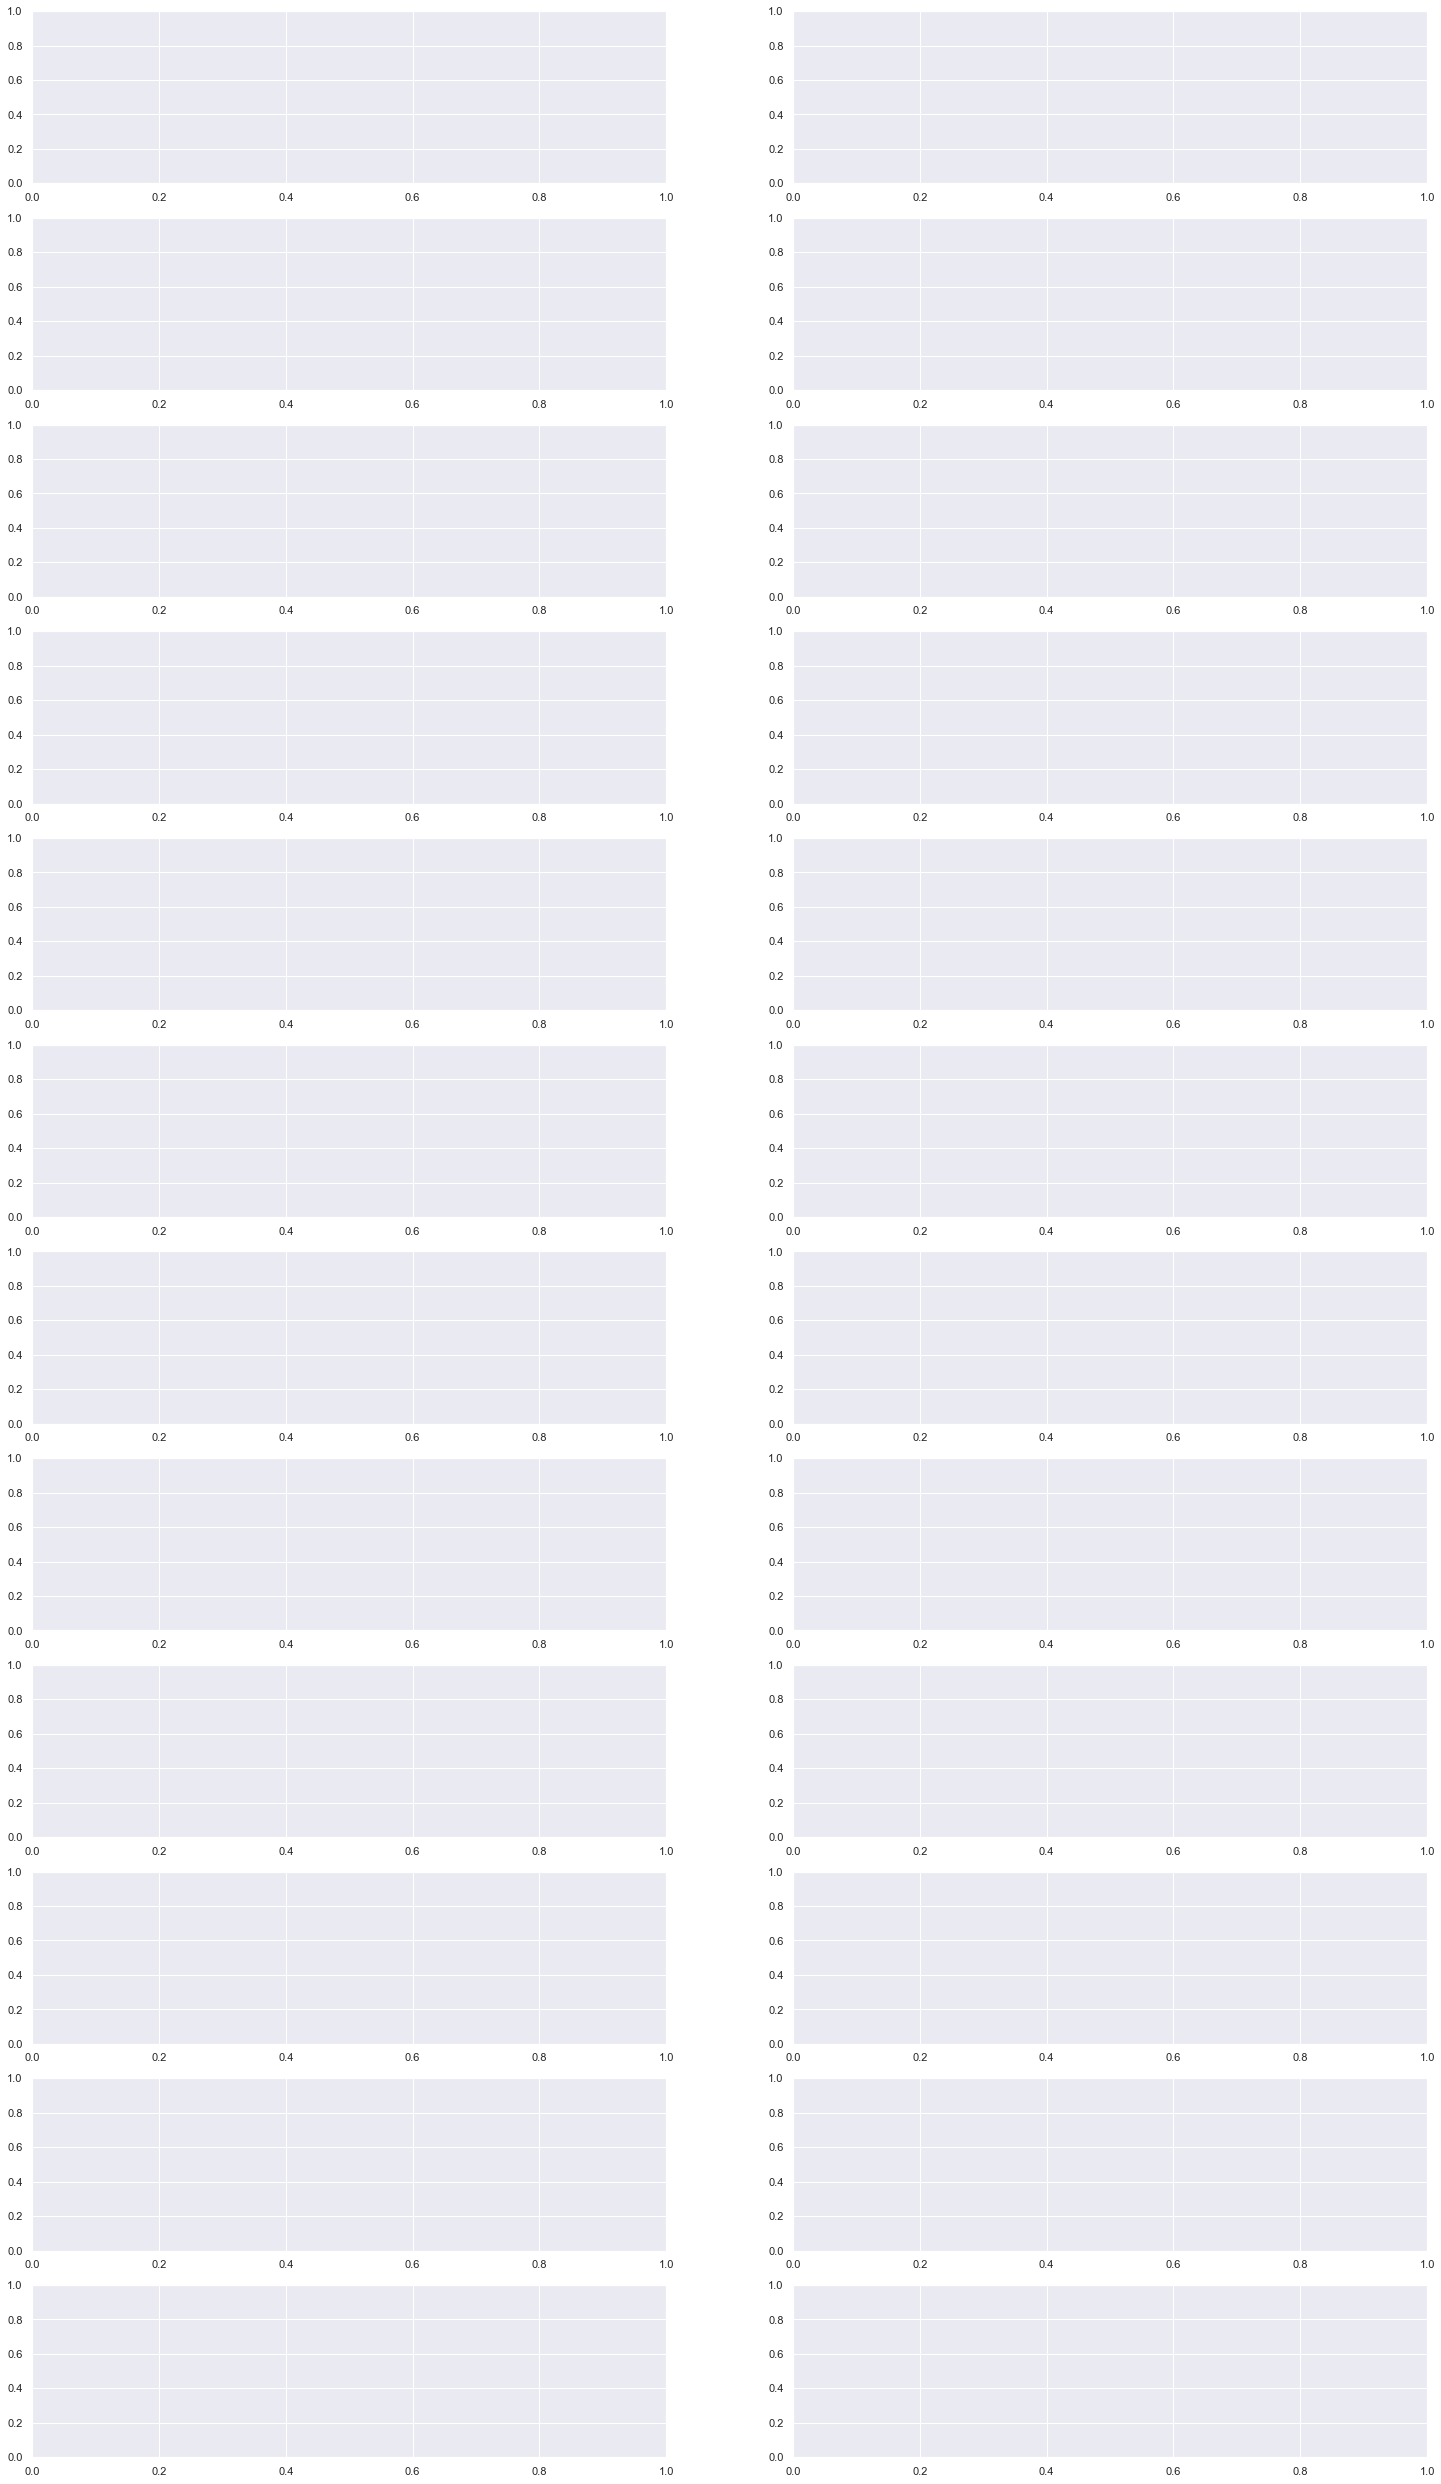

In [83]:
f, axes = plt.subplots(12, 2, figsize=(25, 45))
colors = ["r", "g", "b", "m", "c", "r", "g", "b", "m", "c","r", "g"]

count = 0
for var in df.items():
    if var != 'quality':
        sb.boxplot(x = 'quality', y = var, data=df[var], orient = "h", color = colors[count], ax = axes[count,0])
        sb.histplot(data=df[var], color = colors[count], ax = axes[count,1])
        count += 1

# Classification Problem - find the variables that determine the quality of wine - Decision Tree

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5654712260216848

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.535



<AxesSubplot:>

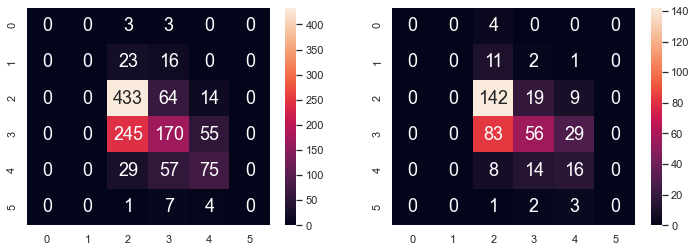

In [40]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
y = pd.DataFrame(df['quality'])
x = pd.DataFrame(df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

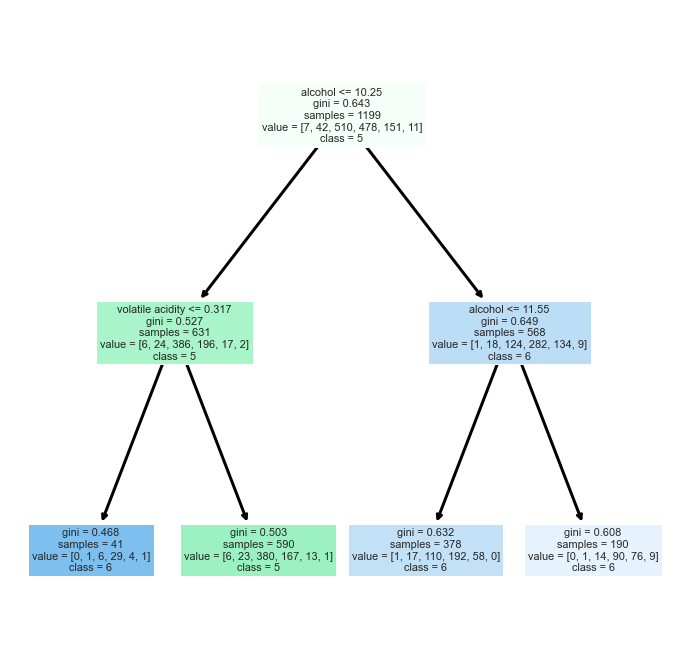

In [42]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

In [50]:
X = df.drop(columns=['quality'])
y = pd.DataFrame(df['quality'])

from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
# transform the dataset
X, y = oversample.fit_resample(X, y)

y.value_counts()

ModuleNotFoundError: No module named 'imblearn'

In [44]:
from sklearn.model_selection import cross_val_score, train_test_split
def classify(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    # train the model
    model.fit(x_train, y_train)
    print("Accuracy:", model.score(x_test, y_test) * 100)
    
    # cross-validation
    score = cross_val_score(model, X, y, cv=5)
    print("CV Score:", np.mean(score)*100)

In [53]:
model = DecisionTreeClassifier()
y = pd.DataFrame(df['quality'])
x = pd.DataFrame(df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]) 
classify(dectree, x, y)

Accuracy: 52.5
CV Score: 52.970807210031346


# Linear Regression

Intercept of Regression 	: b =  [17.40704778]
Coefficients of Regression 	: a =  [[ 2.27820472e-02 -1.09979775e+00 -2.30320779e-01 -6.00322415e-03
  -2.04639810e+00  6.51719985e-03 -3.39575845e-03 -1.28141385e+01
  -6.19103679e-01  9.41060483e-01  3.01237309e-01]]

              Predictors  Coefficients
0          fixed acidity      0.022782
1       volatile acidity     -1.099798
2            citric acid     -0.230321
3         residual sugar     -0.006003
4              chlorides     -2.046398
5    free sulfur dioxide      0.006517
6   total sulfur dioxide     -0.003396
7                density    -12.814138
8                     pH     -0.619104
9              sulphates      0.941060
10               alcohol      0.301237



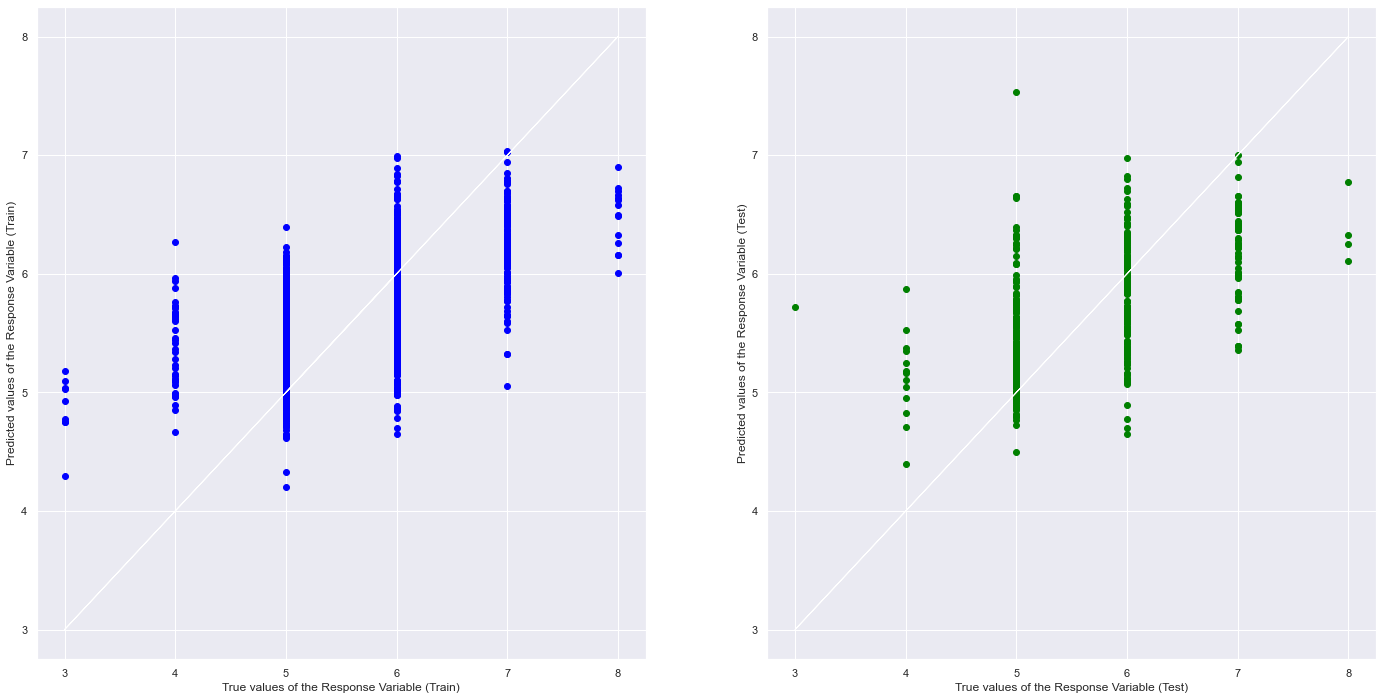

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.38225199968864143
Mean Squared Error (MSE) 	: 0.40102285008049815

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.2843324351553771
Mean Squared Error (MSE) 	: 0.47133418528438836



In [57]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
y = pd.DataFrame(df['quality'])
x = pd.DataFrame(df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()